# Logistic Regression

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Decision Boundry

we will use `Iris` dataset to represent it

### Load Dataset

In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(iris.feature_names)

print(iris.target_names)

print(iris.DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ==

### Visualize Decision boundry in Case 1-D

- let's __simplify__ problem to observe more
- since `petal_width` is the highest correlated with class let's use it only
- and let's make it binary classifier problem `is it Iris-Virginica or not`

In [43]:
X = iris.data[:, 3:]
y = (iris.target == 2).astype(int)

In [48]:
X.shape, y.shape

((150, 1), (150,))

In [52]:
X.min(), X.max(), X.mean(), X.std()

(0.1, 2.5, 1.1993333333333336, 0.7596926279021594)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_reg = LogisticRegression().fit(X, y)

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

y_proba.shape

(1000, 2)

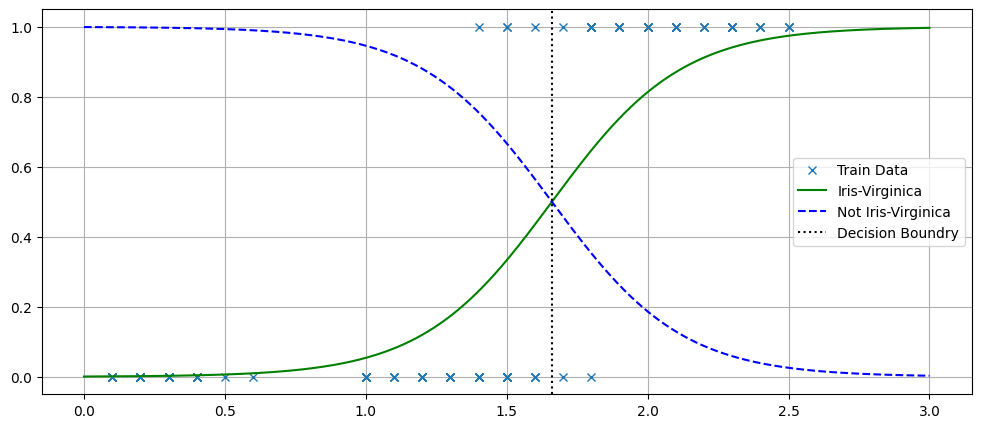

In [86]:
plt.figure(figsize=(12, 5))
plt.plot(X.ravel(), y, 'x', label="Train Data")
plt.plot(X_new.ravel(), y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new.ravel(), y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.axvline(x = 1.66, linestyle=':', color='black', label="Decision Boundry")
plt.grid()
plt.legend()

In [73]:
# get decision boundry
# y_proba[(y_proba[:,1] >= 0.5) & (y_proba[:,1] < 0.55)]
# ((y_proba[:,1] >= 0.5) & (y_proba[:,1] < 0.55)).argmax() #553
# y_proba[553,1]
X_new[553]

array([1.66066066])

### Visualize Decision boundry in Case 2-D

will take `petal_width`, `petal_length` as our features

In [87]:
X = iris.data[:, 2:]
# y didn't change

In [88]:
log_reg.fit(X, y)

LogisticRegression()

In [92]:
X.min(axis=0), X.max(axis=0)

(array([1. , 0.1]), array([6.9, 2.5]))

In [136]:
# X_new = np.linspace(1, 7, 100).reshape(1, -1) * np.linspace(0, 3, 100).reshape(1, -1)
# X_new = np.mgrid[1:7, 0:3]
X_new = np.array([np.linspace((1,i), (7, i), 100) for i in np.linspace(0, 3, 100)]).reshape(-1, 2)
y_proba = log_reg.predict_proba(X_new)

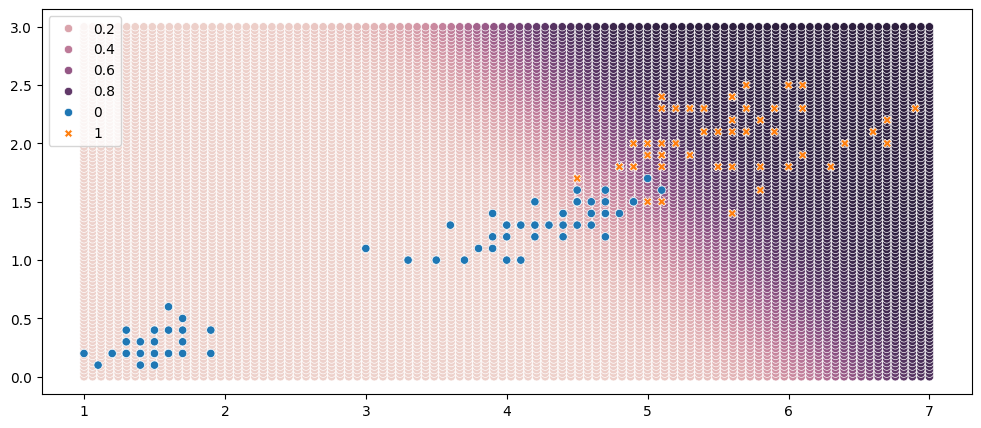

In [137]:
plt.figure(figsize=(12, 5))

sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=y_proba[:, 1])
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y)

plt.legend()

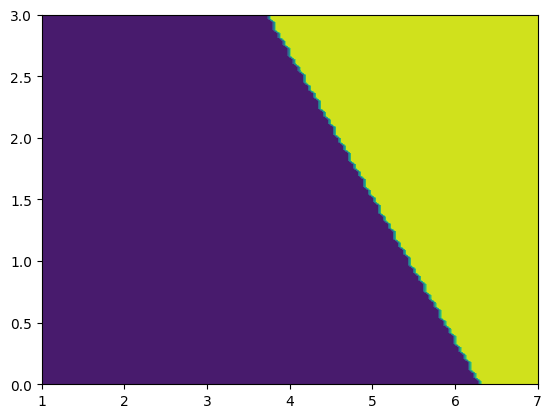

In [172]:
# feature_1, feature_2 = np.linspace(1, 7), np.linspace(0, 3)

feature_1, feature_2 = np.meshgrid( np.linspace(1, 7, 100), np.linspace(0, 3, 100) )

X = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = log_reg.predict(X)

plt.contourf(feature_1, feature_2, y_pred.reshape(feature_1.shape))

In [138]:
from sklearn.inspection import DecisionBoundaryDisplay

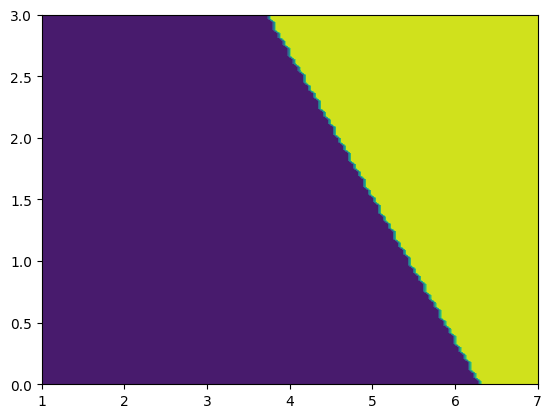

In [169]:

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred.reshape(feature_1.shape))
display.plot()

<div class="alert alert-block alert-warning">Note: LogisticRegression use by default <b>l2</b> regularization </div>

<div class="alert alert-block alert-info">Info: The hyperparameter controlling the regularization strength of a Scikit-Learn
LogisticRegression model is not alpha (as in other linear models), but its inverse:
<b>C</b>. The higher the value of C, the less the model is regularized.
 </div>



# Softmax Regression

In [173]:
X = iris.data[:, 2:] # petal_width, petal_length
y = iris.target

In [175]:
# solver="lbfgs" by default which is softmax 
# multi_class="auto" as default (because it depend on solver) so it's multinomial, lbfgs without need to specify it
# l2 penalty as default aslo
# C inverse of regularization by default = 1
# softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg = LogisticRegression(C=10).fit(X, y)

In [177]:
softmax_reg.predict([[5, 2]])

array([2])

In [178]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])

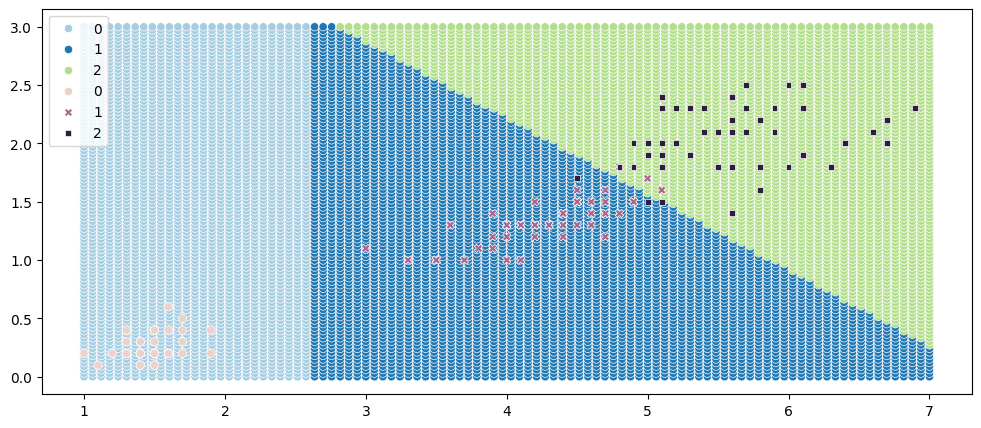

In [185]:
plt.figure(figsize=(12, 5))

y_new = softmax_reg.predict(X_new)
sns.scatterplot(x=X_new[:, 0], y=X_new[:, 1], hue=y_new, palette="Paired")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y)

plt.legend()

<Axes: >

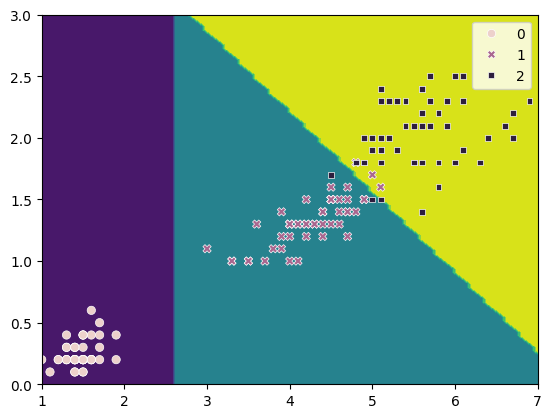

In [192]:
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_new.reshape(feature_1.shape)
)

display.plot()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, style=y)
